In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Dataset\Dataset\Training\Features_Variant_4.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# Import the merged Test data with all 8 testcases

testdata = pd.read_csv(r"C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Dataset\Dataset\Testing\TestSet\TestData.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data1 = train_test_split(data, test_size = 0.20, random_state = 20)

In [5]:
## Final Test Data
test_data=test_data1.append(testdata, ignore_index = True)

In [6]:
## Feature scaling training  data set 
from sklearn import preprocessing
fea_scaling = preprocessing.StandardScaler().fit(train_data[['Likes','Checkin','PageTheme','PageCategory','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','HLocal']])
traindata = fea_scaling.transform(train_data[['Likes','Checkin','PageTheme','PageCategory','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','HLocal']])

In [7]:
## Getting y_train from the Training data set
y_train = train_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_train=np.array(y_train)
y_train=np.reshape(y_train,(len(train_data),1))

In [8]:
## Feature Scaling the test Data set
fea_scaling1 = preprocessing.StandardScaler().fit(test_data[['Likes','Checkin','PageTheme','PageCategory','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','HLocal']])
testdata = fea_scaling1.transform(test_data[['Likes','Checkin','PageTheme','PageCategory','CC1','CC2','CC3','CC4','CC5','BaseTime','PostLength','PostShareCount','HLocal']])

In [9]:
## Getting y_train from the Training data set
y_test = test_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_test=np.array(y_test)
y_test=np.reshape(y_test,(len(test_data),1))

In [10]:
## preperation of x for training set for matrix multiplication : 
x_ones = np.ones((len(traindata),1))
x_train = np.append(x_ones,traindata,axis=1)

In [11]:
## preperation of x for test set for matrix multiplication : 
x_ones =np.ones((len(testdata),1))
x_test=np.append(x_ones,testdata,axis=1)

In [12]:
## All the functions for the regression
def costfunction(x, y, beta):
    cost =np.sum(np.power(((x@beta.T)-y),2))/(2*len(x))
    return cost

def gradientdescentFunction(x, y, beta, alpha):
    df = (alpha/len(x))*np.sum(x*((x@beta.T)-y), axis=0)
    beta = beta - df
    return beta

In [15]:
# Initializing beta value
beta=np.zeros([1,len(x_train[0])])

def plotfig(iterations, alpha, ax, ax1, ax3, precision, beta, x_train, y_train, x_test, y_test):
    ax.set_ylabel('J (Theta)',fontsize=18)
    ax.set_xlabel('Iterations', fontsize=18)
    ax1.set_ylabel('J (Theta)',fontsize=18)
    ax1.set_xlabel('Iterations',fontsize=18)
    ax3.set_ylabel('J (Theta) of both train and test',fontsize=18)
    ax3.set_xlabel('Iterations',fontsize=18)
    #threshold = 0.01
    train_cost=[]
    test_cost=[]
    train_cost.append(1000)
    train_dum = []
    for i in range(1,iterations):
        train_cost.append(costfunction(x_train, y_train, beta))
        train_dum.append(costfunction(x_train, y_train, beta))
        test_cost.append(costfunction(x_test, y_test, beta))
        if (train_cost[i-1]-train_cost[i])<= precision:
            break 
        beta= gradientdescentFunction (x_train, y_train, beta, alpha)
        ax.set_title(" Cost = " + str(train_dum[-1]) + " precision = " + str(precision),fontsize=18)
        ax1.set_title(" Cost = " + str(test_cost[-1])  + " precision = " + str(precision),fontsize=18)
        ax3.set_title("Changing threshold error function",fontsize=18)
        plt1 = ax.plot(range(i),train_dum, "r.")
        plt2 = ax1.plot(range(i), test_cost, "b.")
        plt3 = ax3.plot(range(i), train_dum, 'r.')
        plt3 = ax3.plot(range(i), test_cost, 'b.')
    return train_dum, test_cost, beta

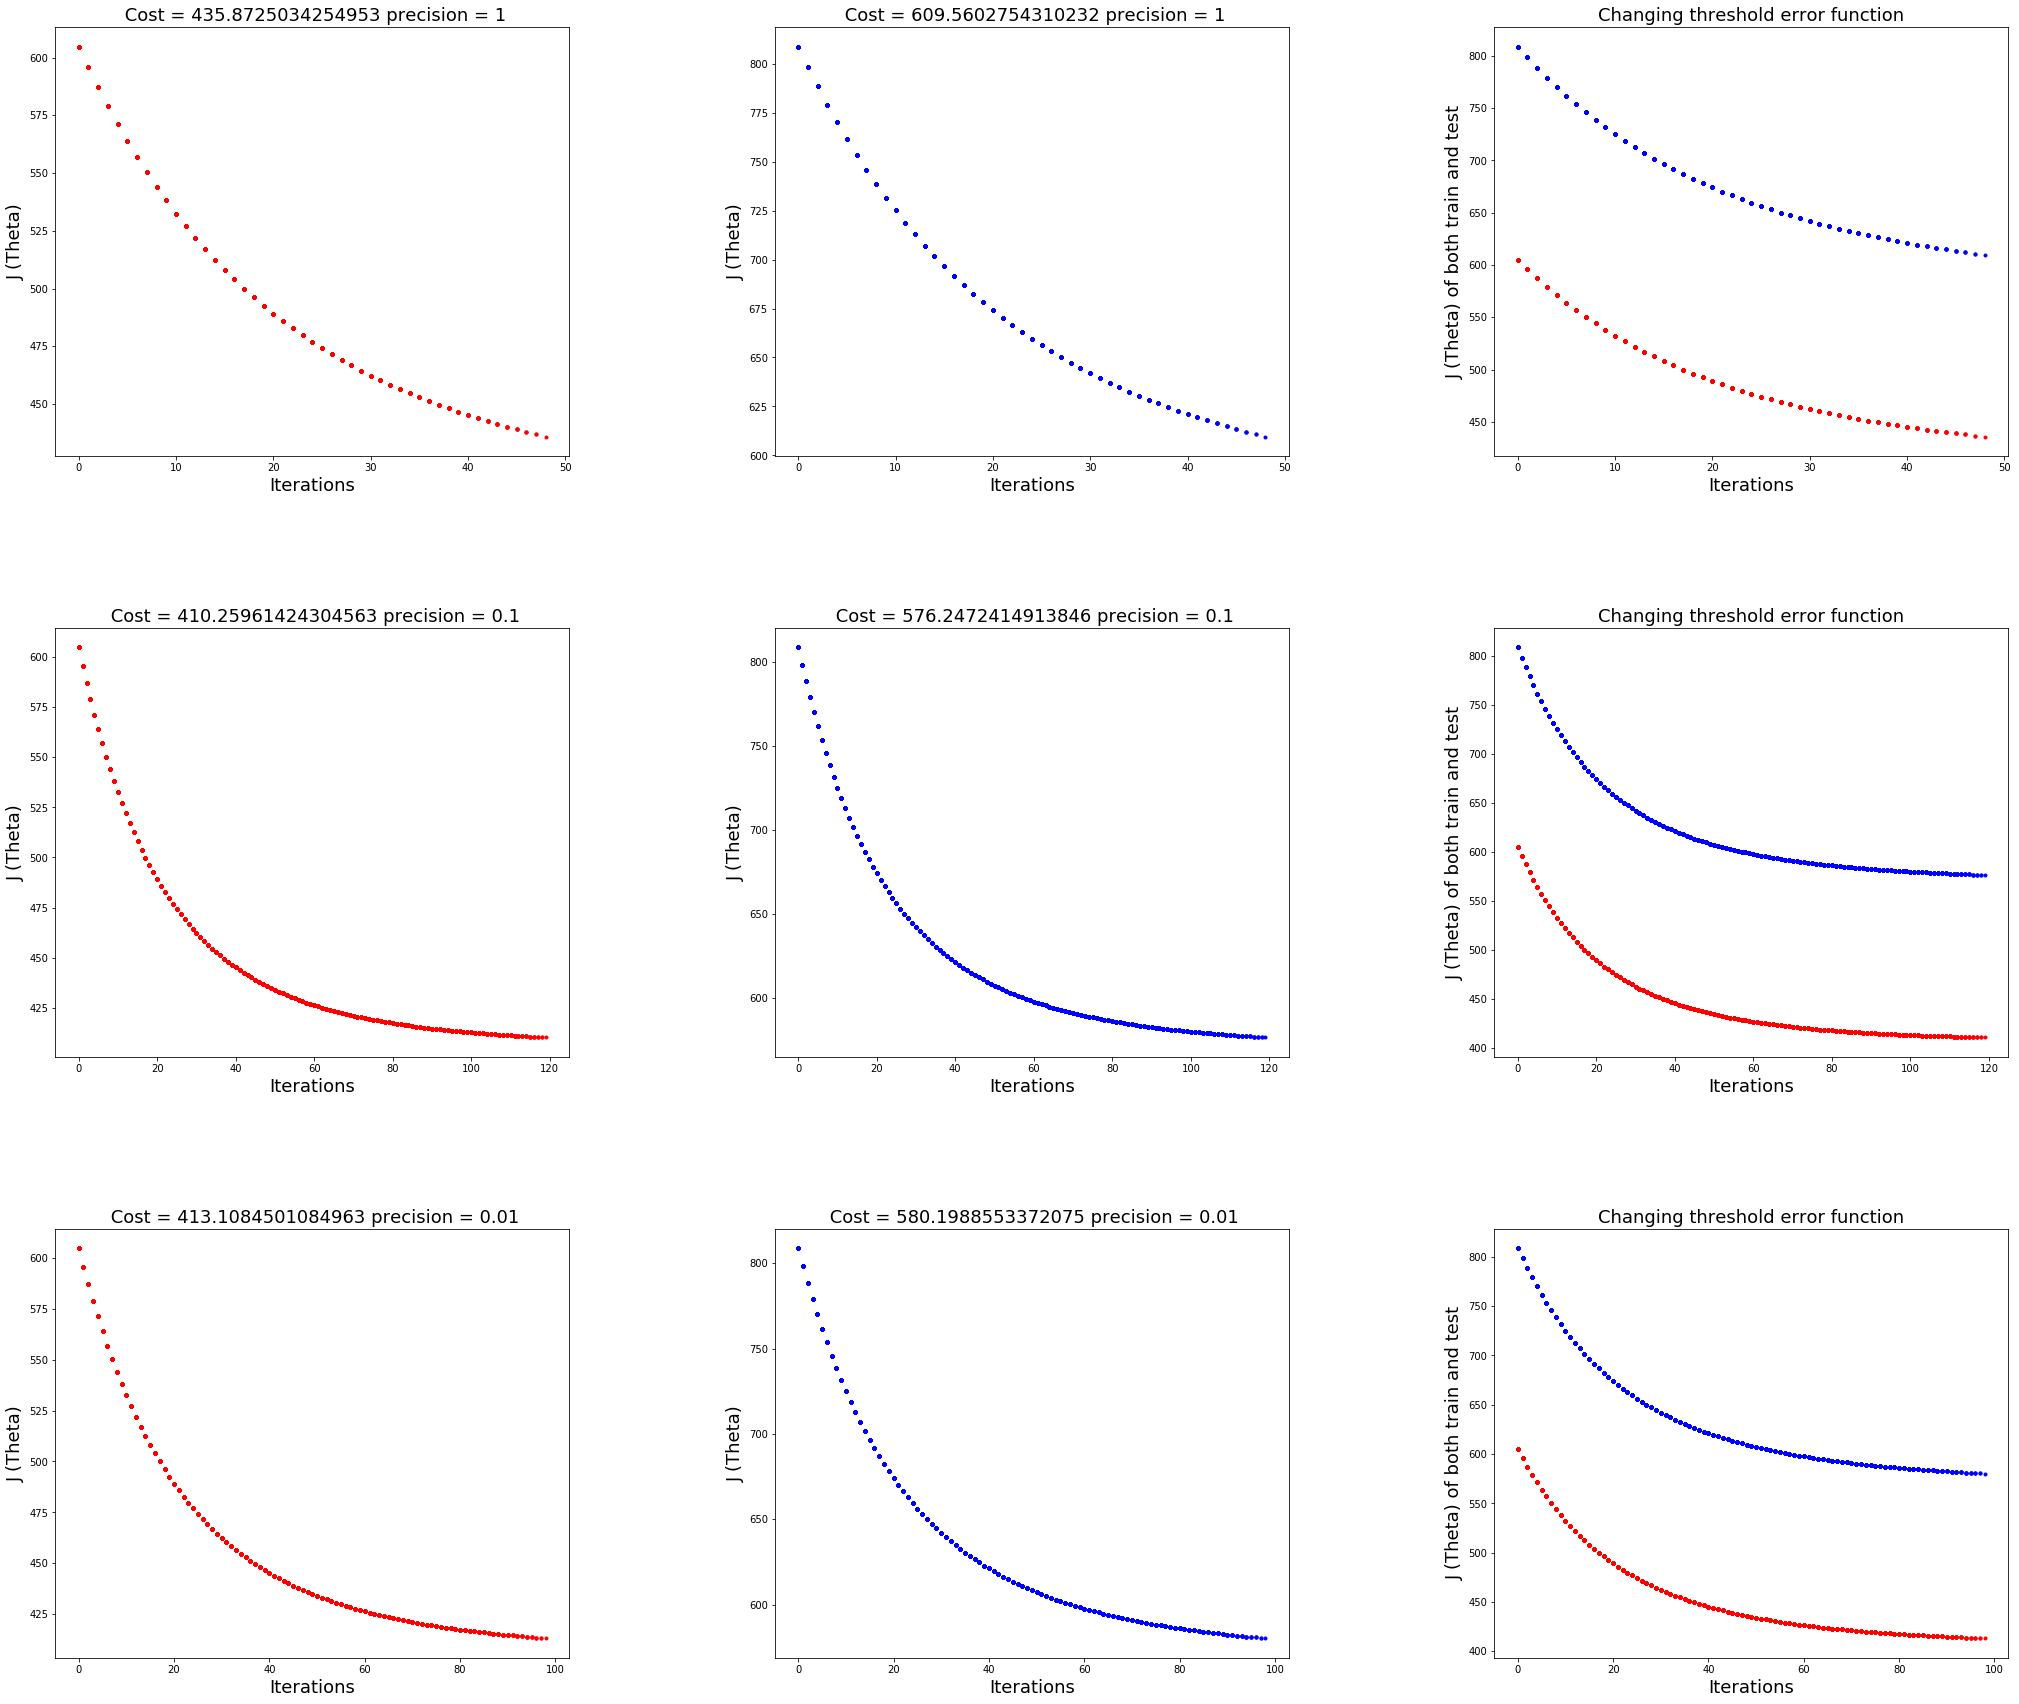

In [16]:
fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
case = [(5000, 0.01, 1),(2500, 0.01, 0.1), (100, 0.01, 0.01)]
count = 0
for iterations, alpha, precision in case:
    count += 1
    ax = fig.add_subplot(3, 3, count)
    count += 1
    ax1 = fig.add_subplot(3, 3, count)
    count += 1
    ax3 = fig.add_subplot(3, 3, count)
    train_dum, test_cost, newB = plotfig(iterations, alpha, ax, ax1, ax3, precision, beta, x_train, y_train, x_test, y_test)

In [17]:
#  Plot error results for train and test sets as a function of threshold and describe how varying the threshold affects error
TEST_COST=[test_cost4[-1],test_cost5[-1],test_cost6[-1],test_cost7[-1],test_cost8[-1]]
TRAIN_COST=[train_cost4[-1],train_cost5[-1],train_cost6[-1],train_cost7[-1],train_cost8[-1]]
THRESHOLDS=[1,0.1,0.01,0.001,0.0001]

plt.plot(THRESHOLDS,TRAIN_COST,'r')
plt.xlabel("Threshold")
plt.ylabel("Train Cost")
plt.title("Graph of Cost as a function of Threshold")
#plt.plot(THRESHOLDS,TEST_COST,'b')

NameError: name 'test_cost4' is not defined

In [ ]:
## Experiment 3 starts ##################################################################

In [18]:
# "Likes","PageTheme","PostPromoStatus","H_Local",'PostPublishSun'

df_random5 = train_data.iloc[:, [0,2,37,38,39,53]]
df_random5.shape

(128339, 6)

In [19]:
## Feature scaling training  data set 
from sklearn import preprocessing
fea_scaling_rand = preprocessing.StandardScaler().fit(train_data[['Likes','Checkin','PostPromoStatus','HLocal','PostPublishSun']])
train_rand_data = fea_scaling_rand.transform(train_data[['Likes','Checkin','PostPromoStatus','HLocal','PostPublishSun']])

In [20]:
## Getting y_train from the Training data set
y_rand_train = train_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_rand_train=np.array(y_rand_train)
y_rand_train=np.reshape(y_rand_train,(len(train_data),1))

In [21]:
## Feature Scaling the test Data set
fea_scaling1_rand = preprocessing.StandardScaler().fit(test_data[['Likes','Checkin','PostPromoStatus','HLocal','PostPublishSun']])
test_rand_data = fea_scaling1_rand.transform(test_data[['Likes','Checkin','PostPromoStatus','HLocal','PostPublishSun']])

In [22]:
## Getting y_train from the Testing data set
y_rand_test = test_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_rand_test = np.array(y_rand_test)
y_rand_test = np.reshape(y_rand_test,(len(test_data),1))

In [23]:
## preperation of x for training set for matrix multiplication : 
x_ones1 = np.ones((len(traindata),1))
x_rand_train = np.append(x_ones1,traindata,axis=1)

In [24]:
x_rand_train.shape

(128339, 14)

In [25]:
## preperation of x for test set for matrix multiplication : 
x_ones2 = np.ones((len(testdata),1))
x_rand_test = np.append(x_ones2,testdata,axis=1)

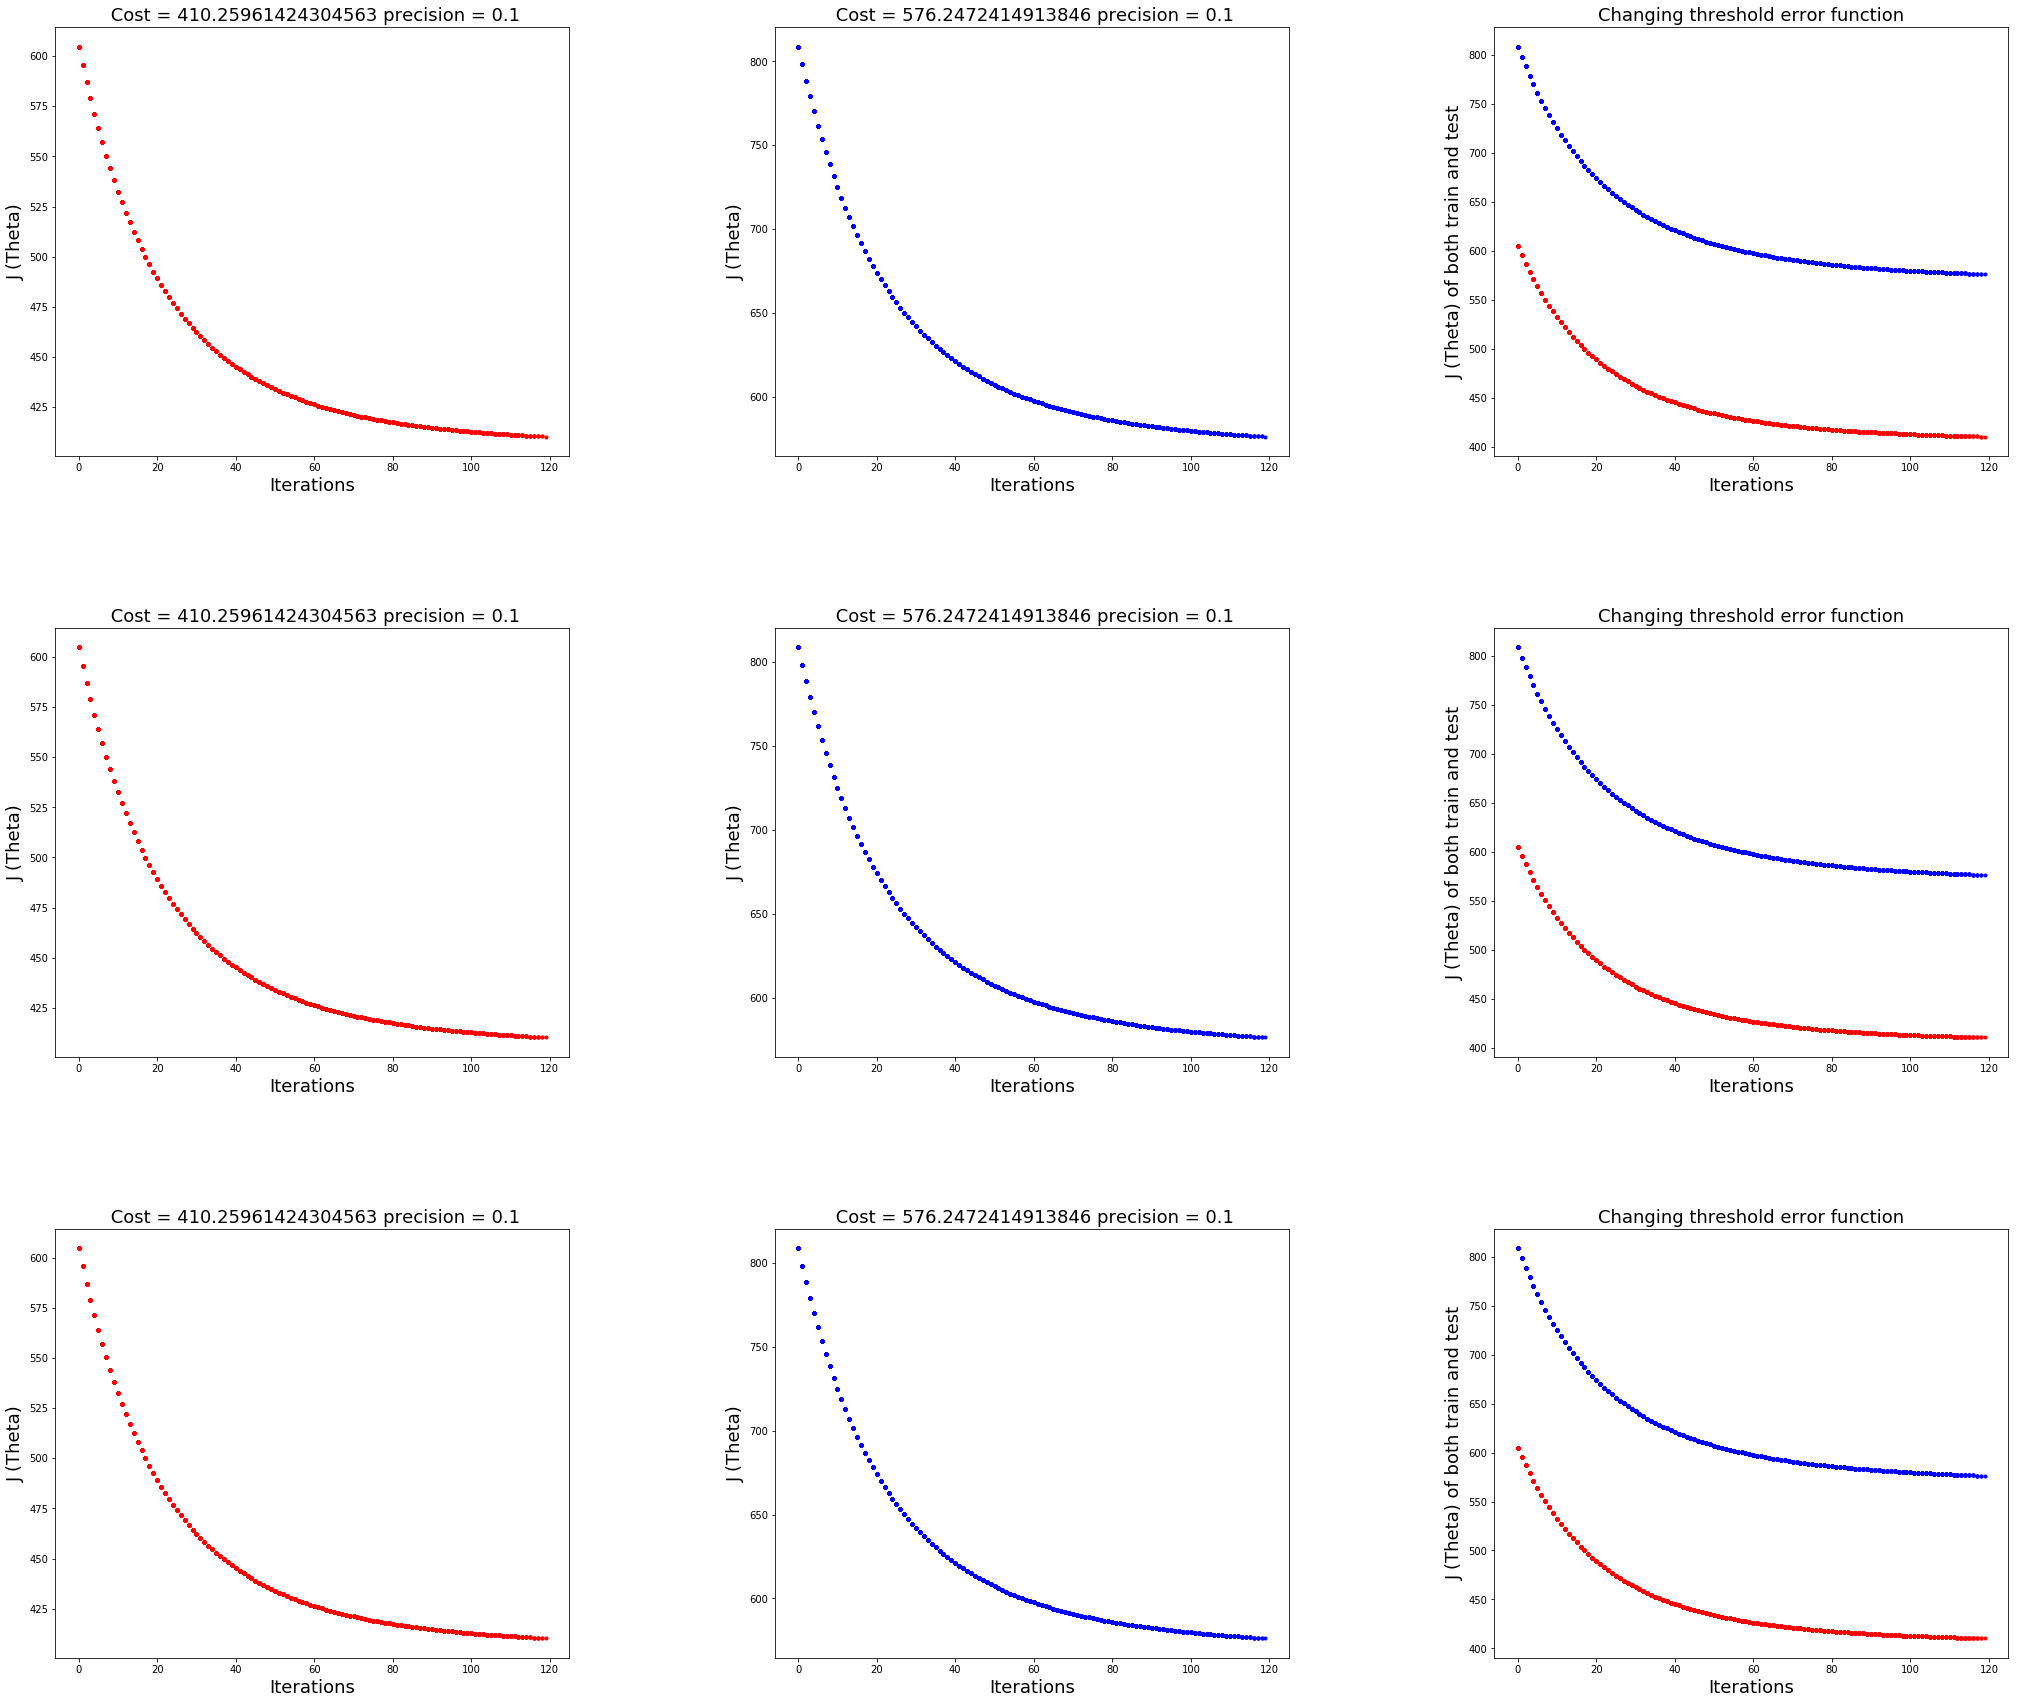

In [37]:
fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
case = [(150, 0.01, 0.1),(500, 0.01, 0.1), (200, 0.01, 0.1)]
count = 0
for iterations, alpha, precision in case:
    count += 1
    ax = fig.add_subplot(3, 3, count)
    count += 1
    ax1 = fig.add_subplot(3, 3, count)
    count += 1
    ax3 = fig.add_subplot(3, 3, count)
    cost_rand_train, cost_rand_test, newbeta = plotfig(iterations, alpha, ax, ax1, ax3, precision, beta, x_rand_train, y_rand_train, x_rand_test, y_rand_test)

In [38]:
newbeta

array([[ 5.00154257, -0.16460971, -0.07562439,  1.90969345, -0.45978836,
         2.895038  ,  7.4115316 ,  0.09796725,  3.10389123,  5.80994994,
        -3.95379042,  0.1060982 ,  0.82078834,  0.46783174]])

In [ ]:
# Experiment 4 ####################################################################

In [27]:
df_perf5 = train_data.iloc[:, [0,2,29,32,38,53]]
df_perf5.shape

(128339, 6)

In [28]:
## Feature scaling training  data set 
from sklearn import preprocessing
fea_scaling_perf = preprocessing.StandardScaler().fit(train_data[['Likes','Checkin','CC1','CC4','HLocal']])
train_perf_data = fea_scaling_perf.transform(train_data[['Likes','Checkin','CC1','CC4','HLocal']])

In [29]:
## Getting y_train from the Training data set
y_perf_train = train_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_perf_train=np.array(y_perf_train)
y_perf_train=np.reshape(y_perf_train,(len(train_data),1))

In [30]:
## Feature Scaling the test Data set
fea_scaling1_perf = preprocessing.StandardScaler().fit(test_data[['Likes','Checkin','CC1','CC4','HLocal']])
test_perf_data = fea_scaling1_perf.transform(test_data[['Likes','Checkin','CC1','CC4','HLocal']])

In [34]:
## Getting y_train from the Testing data set
y_perf_test = test_data.loc[:,'Target']
## Reshaping the y_train for Matrix calculations
y_perf_test = np.array(y_perf_test)
y_perf_test = np.reshape(y_perf_test,(len(test_data),1))

In [31]:
## preperation of x for training set for matrix multiplication : 
x_ones12 = np.ones((len(traindata),1))
x_perf_train = np.append(x_ones12,traindata,axis=1)

In [32]:
## preperation of x for test set for matrix multiplication : 
x_ones22 = np.ones((len(testdata),1))
x_perf_test = np.append(x_ones22,testdata,axis=1)

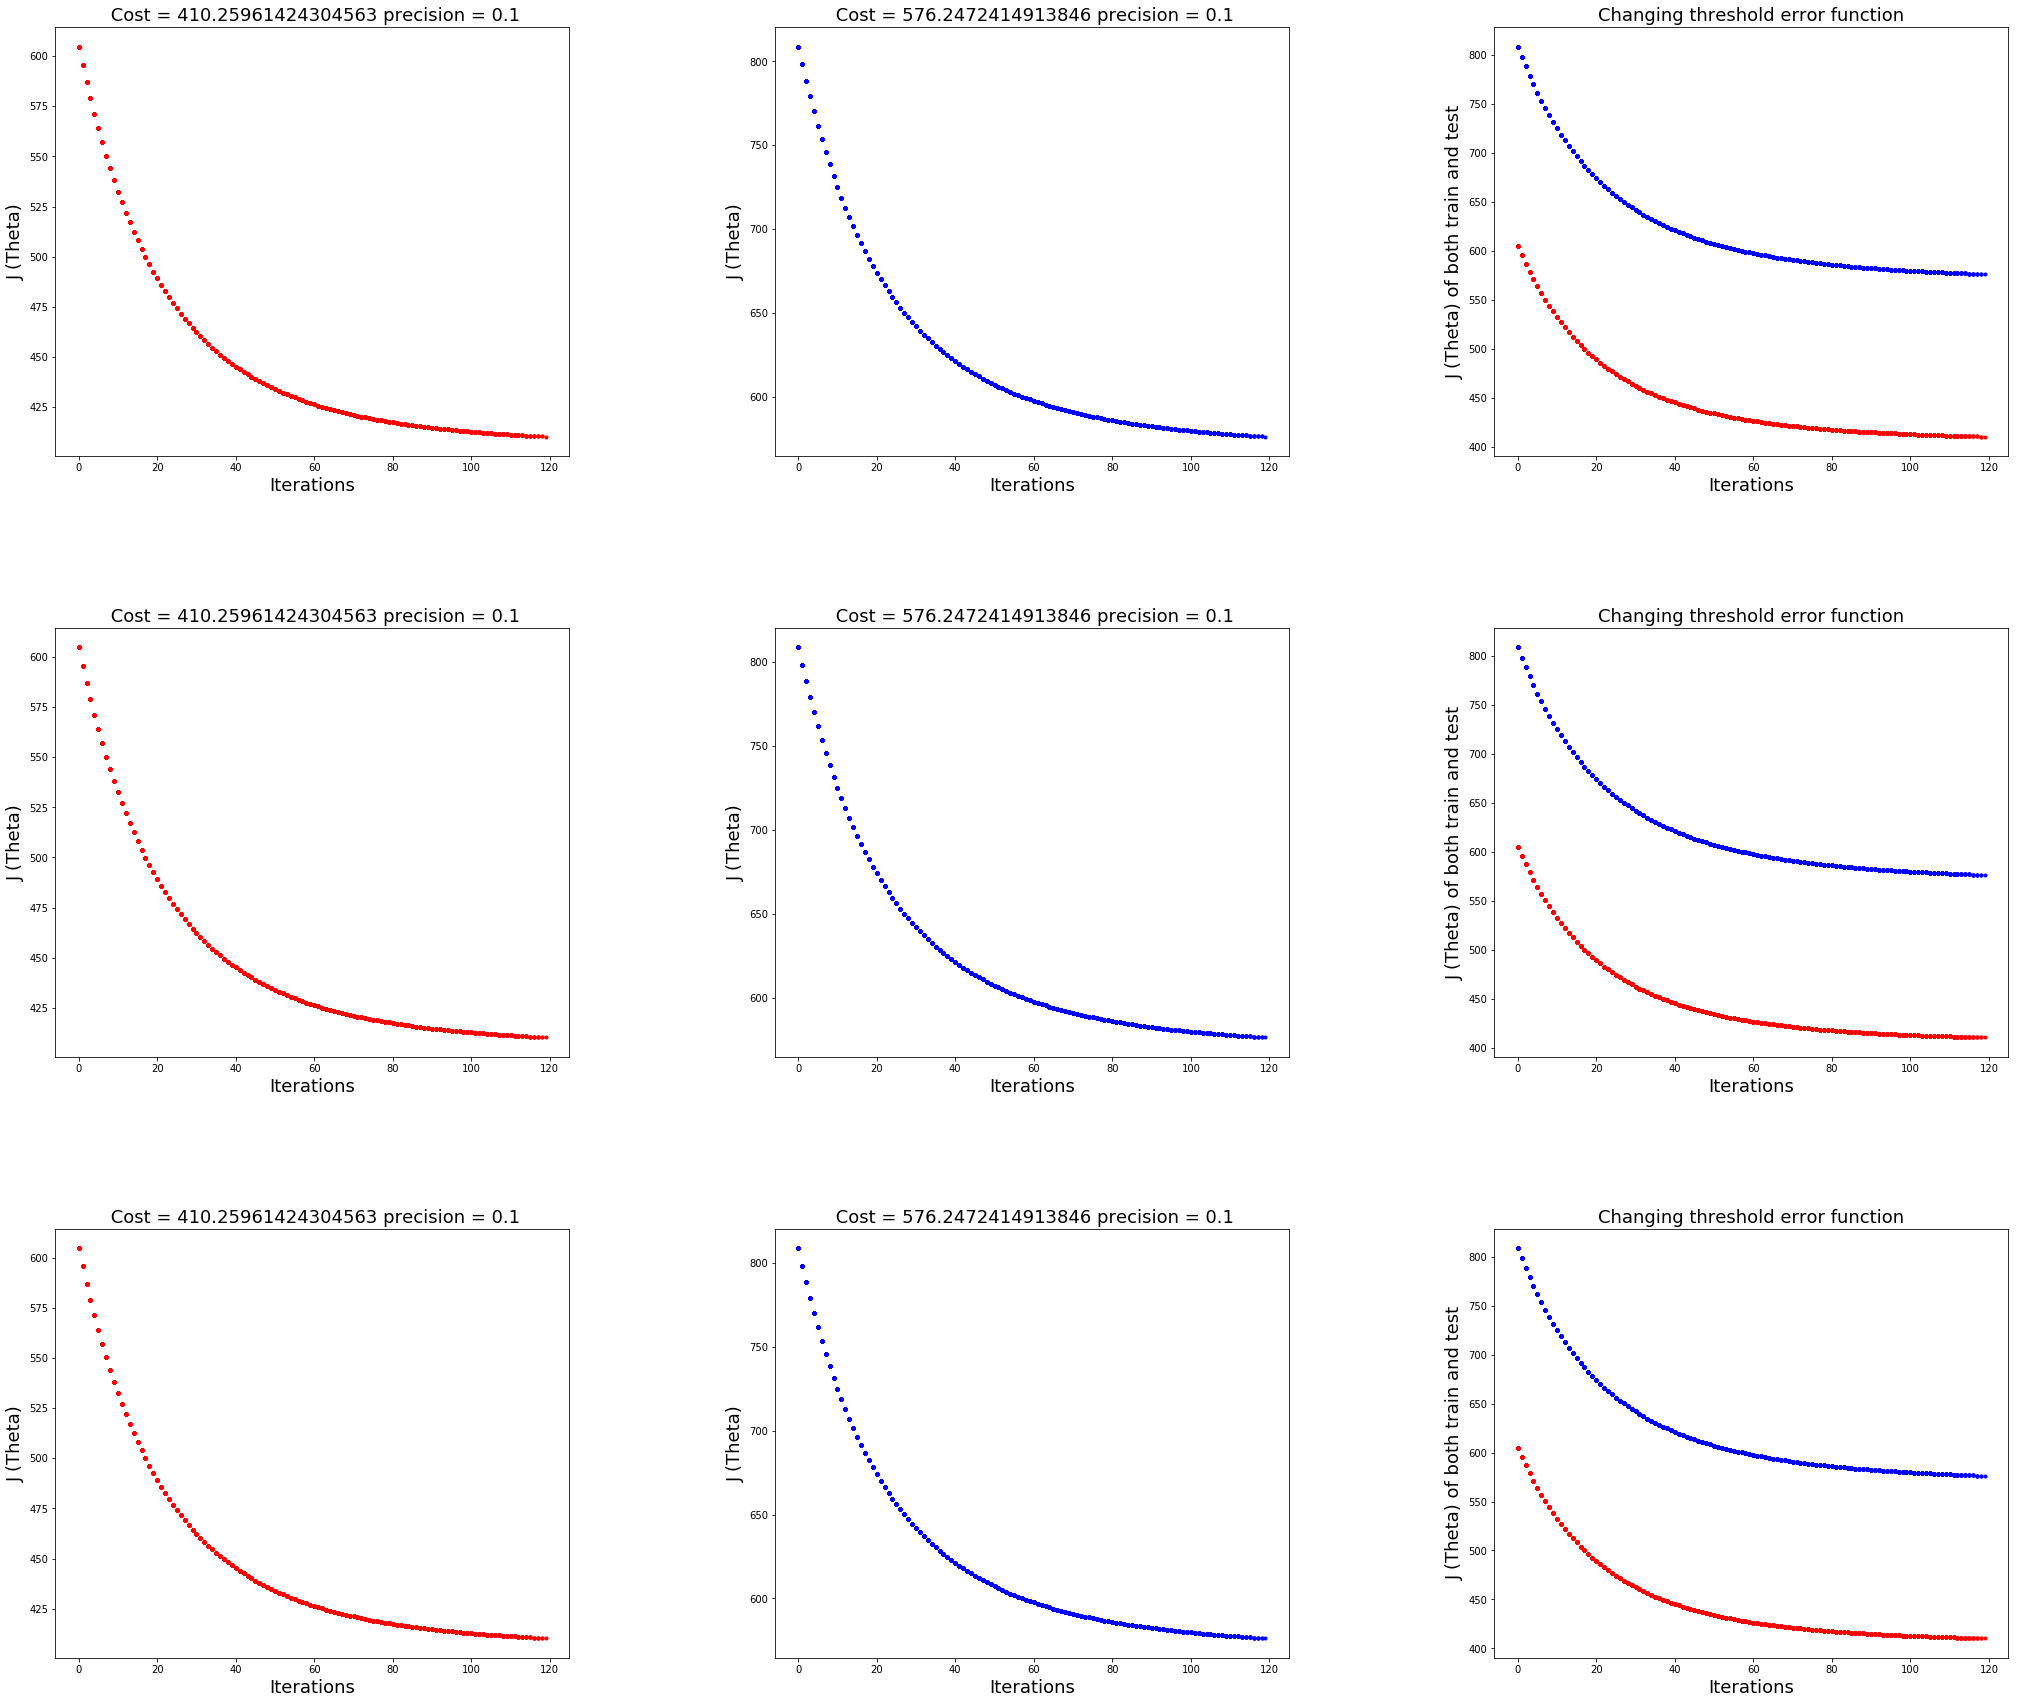

In [39]:
fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
case = [(700, 0.01, 0.1),(1000, 0.01, 0.1), (200, 0.01, 0.1)]
count = 0
for iterations, alpha, precision in case:
    count += 1
    ax = fig.add_subplot(3, 3, count)
    count += 1
    ax1 = fig.add_subplot(3, 3, count)
    count += 1
    ax3 = fig.add_subplot(3, 3, count)
    cost_train_perf, cost_test_perf, newB = plotfig(iterations, alpha, ax, ax1, ax3, precision, beta, x_perf_train, y_perf_train, x_perf_test, y_perf_test)

In [189]:
cost_train_perf[-1]

406.5748714231396

In [190]:
cost_test_perf[-1]

570.8799496494106

In [40]:
newB

array([[ 5.00154257, -0.16460971, -0.07562439,  1.90969345, -0.45978836,
         2.895038  ,  7.4115316 ,  0.09796725,  3.10389123,  5.80994994,
        -3.95379042,  0.1060982 ,  0.82078834,  0.46783174]])

In [ ]:
# Experiment 1 starts here

In [3]:
dffirst = pd.read_csv(r"C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Dataset\Dataset\Training\Features_Variant_4.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [193]:
df_heat = dffirst.loc[:,["Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime"
                       ,"Target"]]

In [12]:
df_feat = dffirst.drop(dffirst.loc[:, 'Derived5':'Derived29'].columns, axis = 1)

# if needed to drop more then use this space
df_feat = df_feat.drop(df_feat.loc[:,'HLocal':'BaseDateTimeSat'].columns, axis = 1)

In [13]:
train

,Likes,Checkin,PageTheme,PageCategory,CC1,CC2,CC3,CC4,CC5,BaseTime,PostLength,PostShareCount,PostPromoStatus,Target
13592,3002026,0,77240,9,6,0,6,6,-6,40,83,1,0,0
154617,1492303,0,187752,24,730,49,164,640,-115,55,118,191,0,21
121197,518876,0,51411,24,5,5,0,5,5,10,87,20,0,2
55206,208,177,1,76,0,0,0,0,0,67,0,1,0,0
159346,1009493,175714,47503,9,14,3,11,14,-8,30,19,14,0,0
51310,565299,0,53207,18,94,1,43,92,-42,51,241,16,0,2
30708,160261,0,4347,28,96,4,13,89,-9,58,20,18,0,0
19255,4290409,11,131422,9,138,13,125,133,-112,40,163,178,0,2
160352,7170111,70,497000,9,340,7,28,317,-21,66,52,160,0,2
133991,6135,0,1,14,1,1,0,1,1,4,60,4,0,0


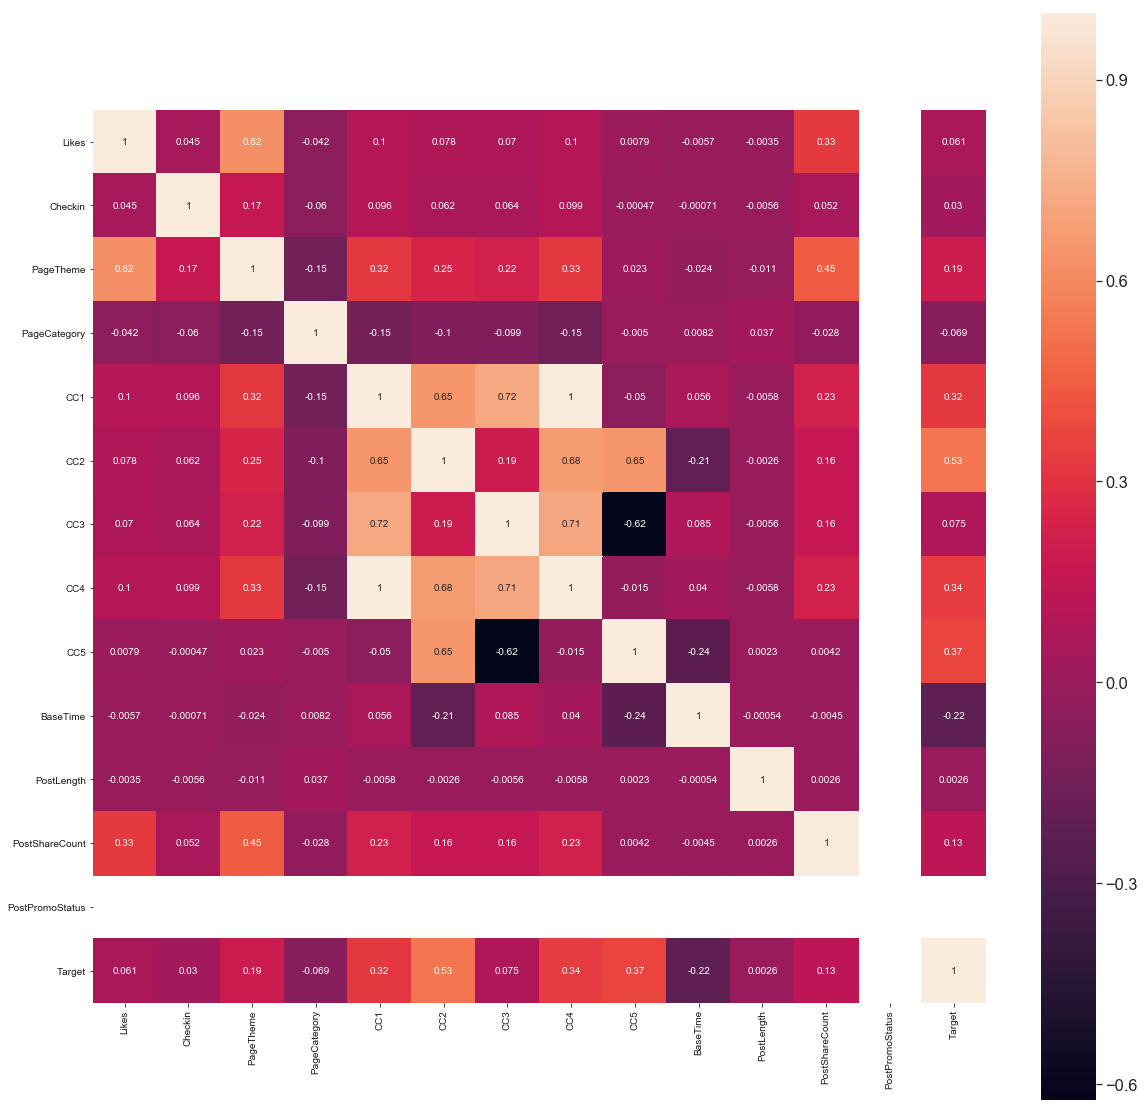

In [198]:
# Heat Map
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=1.5)
sns.heatmap(df_feat.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_feat, test_size=0.2)

In [6]:
X_sel = train.iloc[:,0:13].values
X0 = np.ones([X_sel.shape[0],1])
# append
X_sel_ap = np.append(X0,X_sel,axis=1)

In [201]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
X_ob = scaler.fit_transform(X_sel_ap)

In [202]:
Y_sel = train.iloc[:,13].values
Y = np.reshape(Y_sel,(len(train),1))

In [204]:
# Setting Beta values to 0 for intital setup
beta = np.zeros([X_sel_ap.shape[1],1])

In [205]:
# Defining Cost Function
def cost_functionfirst(X, Y, beta):
    m = len(Y)
    J = np.sum((X.dot(beta) - Y) ** 2)/(2 * m)
    return J

In [206]:
def gradient_descentfirst(X, Y, B, alpha, iterations, precision):
    cost_history = [0] * iterations
    cost_value_test = [0]* iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_functionfirst(X, Y, B)
        cost_test = cost_functionfirst(scaled_X_test, Y_merge, B)
        
        prev_cost = cost_history[iteration - 1]
        cost_history[iteration] = cost
        cost_history = np.array(cost_history)
        cost_value_test[iteration] = cost_test
    
    return B, cost_history, iteration, cost_value_test

In [221]:
# plotting cost function vs iterations

def plotfigfirst(iterations, alpha, ax, ax1, precision):
    ax.set_ylabel('J (Theta)')
    ax.set_xlabel('Iterations')
    ax1.set_ylabel('J (Theta)')
    ax1.set_xlabel('Iterations')
    newB, cost_history, iteration, cost_test = gradient_descentfirst(X_ob, Y, beta, alpha, iterations, precision)
    ax.set_title("alpha: " + str(alpha) + " Cost =   " + str(cost_history[-1]))
    ax1.set_title("alpha: " + str(alpha) + " Cost =   " + str(cost_test[-1]))
    if(iterations-iteration == 1):
        iteration += 1
    plt1 = ax.plot(range(iteration),cost_history,'r.')
    plt2 = ax1.plot(range(iteration), cost_test, 'b.')
    return newB, cost_history, cost_test

In [208]:
# Import the merged Test data with all 8 testcases

testdatafirst = pd.read_csv(r"C:\Users\avanm\OneDrive\Desktop\ML_Spring2019\Dataset\Dataset\Testing\TestSet\TestData.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [210]:
# dropping Derivede5 : Derived 29 columns

testdata_drop = testdatafirst.drop(testdatafirst.loc[:, 'Derived5':'Derived29'].columns, axis = 1)
# if needed to drop more then use this space
testdata_drop = testdata_drop.drop(testdata_drop.loc[:,'HLocal':'BaseDateTimeSat'].columns, axis = 1)

# Merging with the previous splitted test (80:20 split data)
merge_list = [test,testdata_drop]
mergedata = pd.concat(merge_list, ignore_index = True)

In [211]:
# standardizing the data with Target variable in mergedata

# Defining X (testing) and Y (testing) from mergedata
X_merge = mergedata.loc[:,'Likes':'PostPromoStatus']
Y_merge = mergedata.loc[:,'Target'].values

# Get columns first
names1 = X_merge.columns

# Create a scaler object
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_X_merge = scaler.fit_transform(X_merge)
scaled_X_merge = pd.DataFrame(scaled_X_merge, columns = names1)

In [212]:
pred_ones = np.ones([scaled_X_merge.shape[0],1])
scaled_X_test = np.append(pred_ones, scaled_X_merge,axis=1)

In [213]:
Y_merge = np.reshape(Y_merge, (Y_merge.shape[0],1))

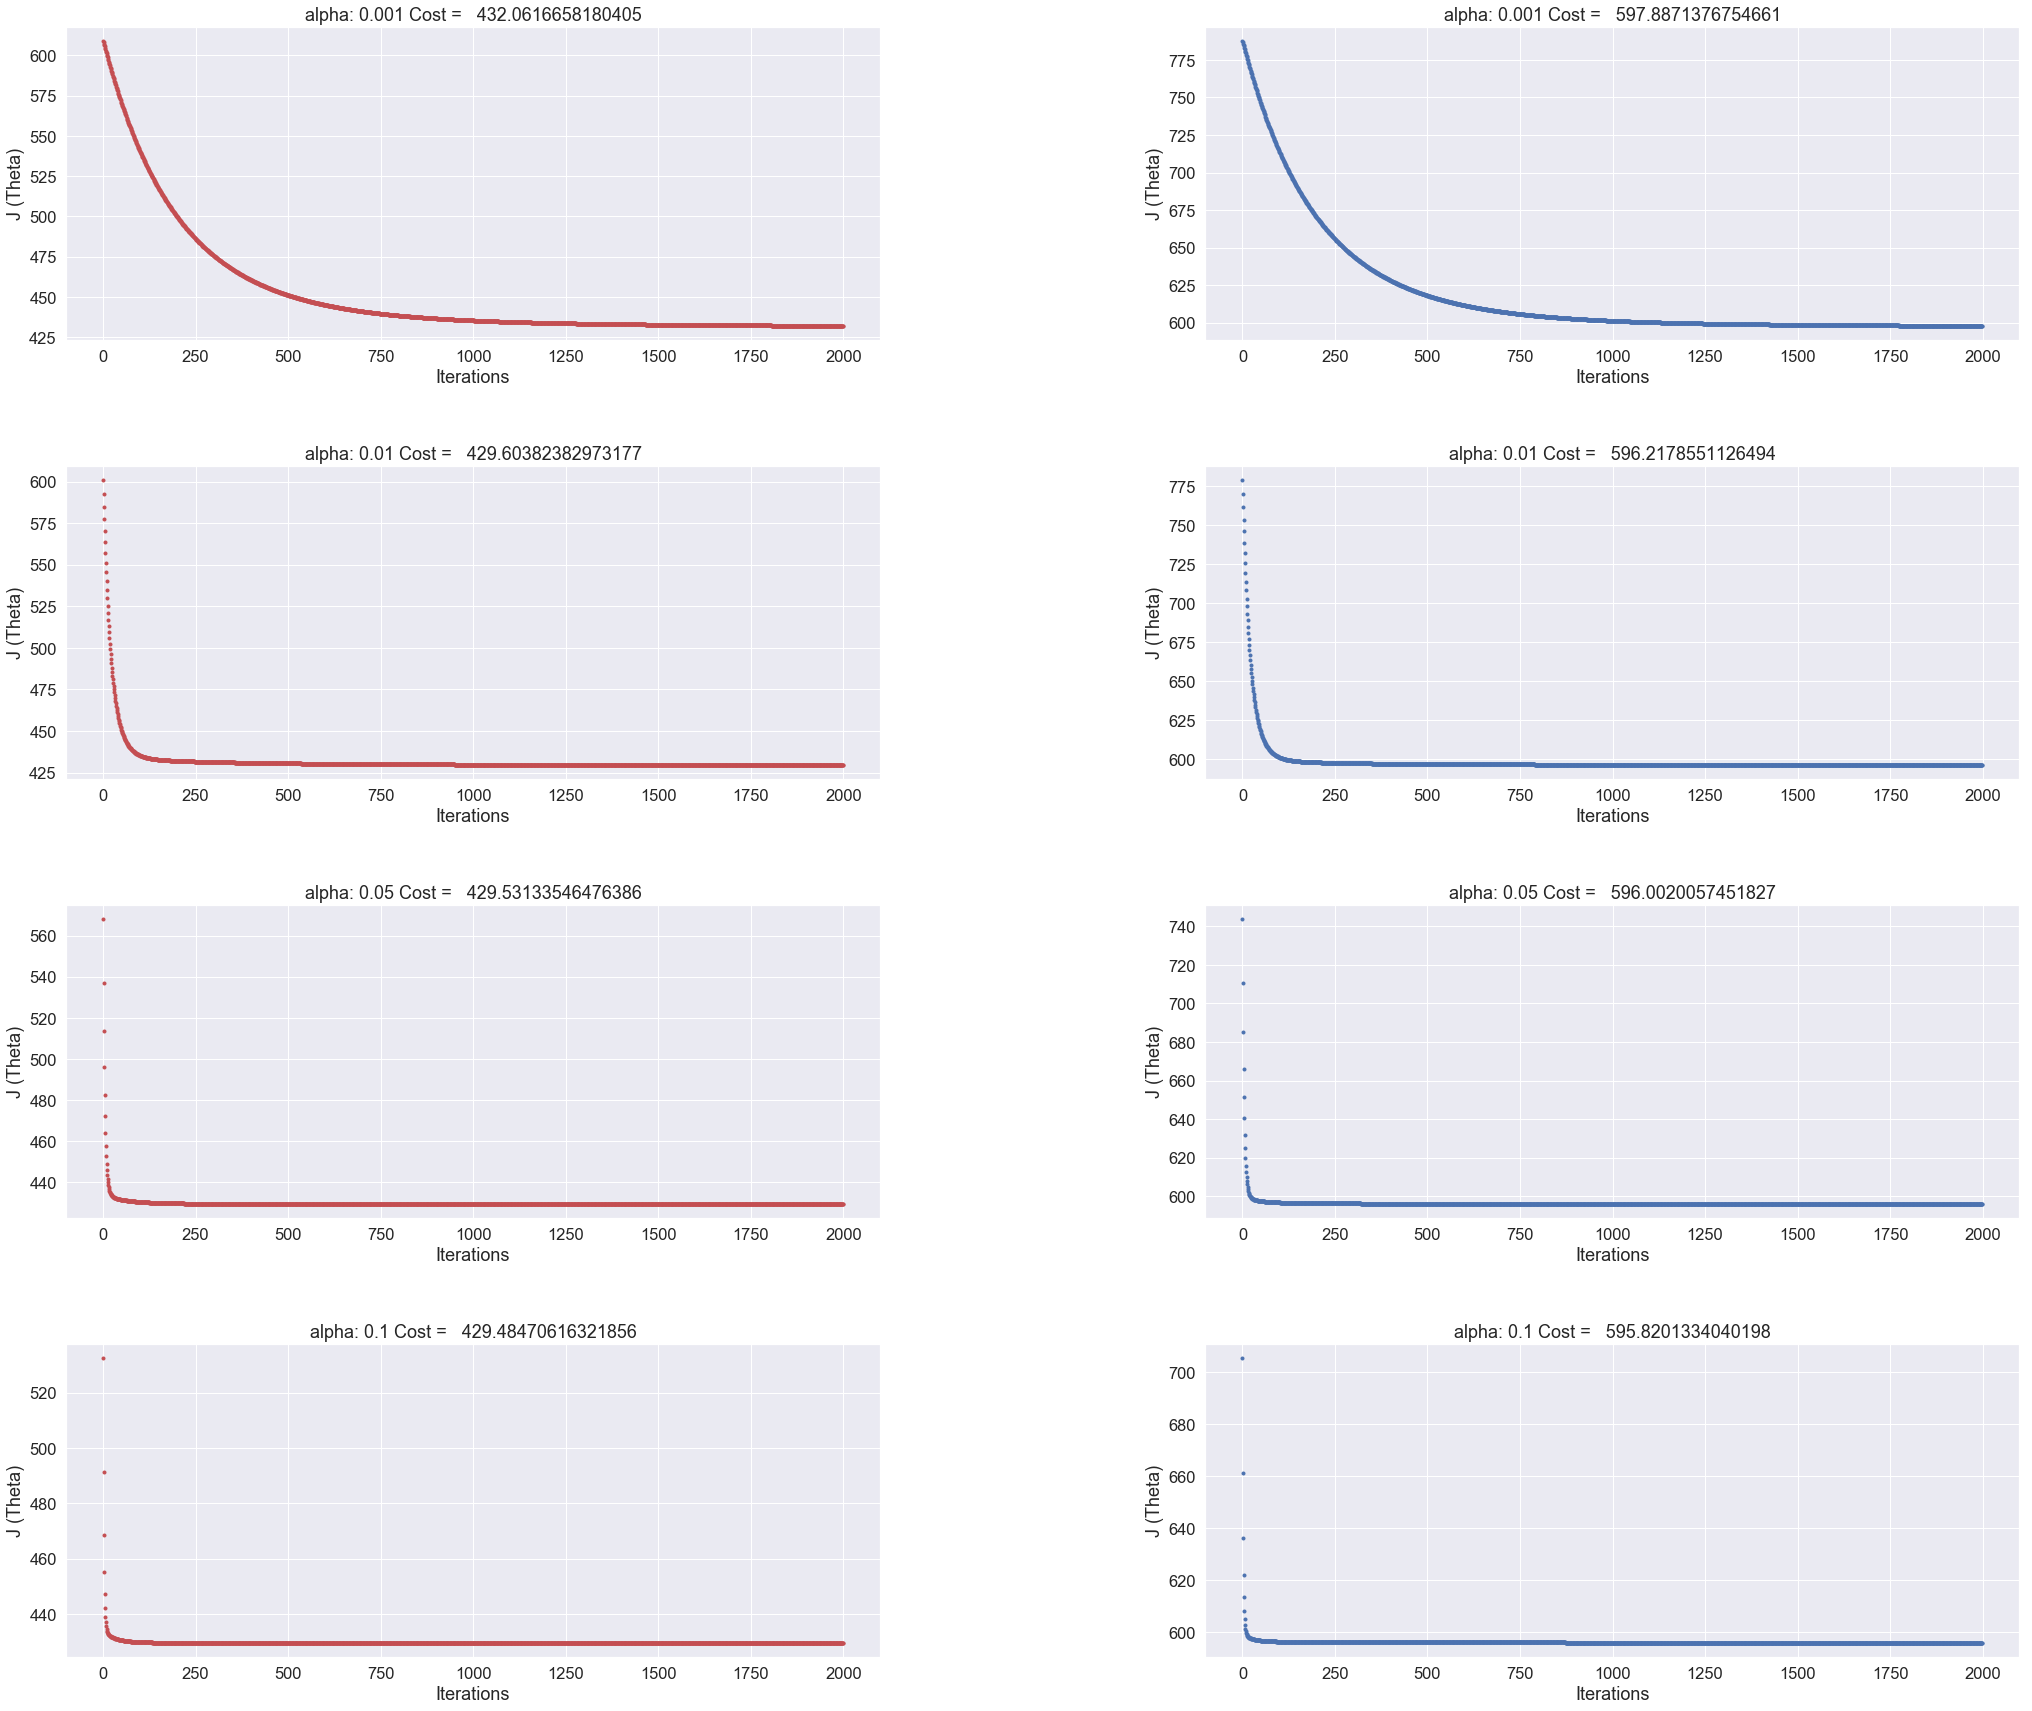

In [223]:
# Plot the graphs for different iterations and learning rates combination

fig = plt.figure(figsize=(35,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

case =[(2000,0.001,0.01),(2000,0.01,0.01),(2000,0.05,0.01),(2000,0.1,0.01)]
count = 0
for iterations, alpha, precision in case:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4, 2, count)
    newB, cost_history, cost_test = plotfigfirst(iterations, alpha, ax, ax1, precision)